In [1]:
import numpy as np
import matplotlib.pyplot as plt

import utils.projectParameters as parameters
import utils.UCB_SW as swucb
import utils.UCB_Cusum as cusumucb
import Environment5 as env
import utils.UCB_Opt5 as ucb_opt
from tqdm import tqdm

In [2]:
np.random.seed(parameters.seed)

T = 365
class_id = 1
env = env.Environment5(class_id, T)
opt = np.array([env.get_optimal_price(t) for t in range(T)])
n_arms = env.n_arms

window_size = int(2 * (T ** 0.5))
M = 25
eps = 0.01
h = 0.5 * np.log(T)
alpha = np.sqrt(5 * np.log(T) / T)

n_experiments = 100

# 1. UCB-SW

In [9]:
window_sizes = np.array([int(1 * (T ** 0.5)), int(2 * (T ** 0.5)), int(5 * (T ** 0.5)), int(10 * (T ** 0.5)), int(20 * (T ** 0.5))])

 28%|██▊       | 28/100 [00:01<00:03, 18.52it/s]


KeyboardInterrupt: 

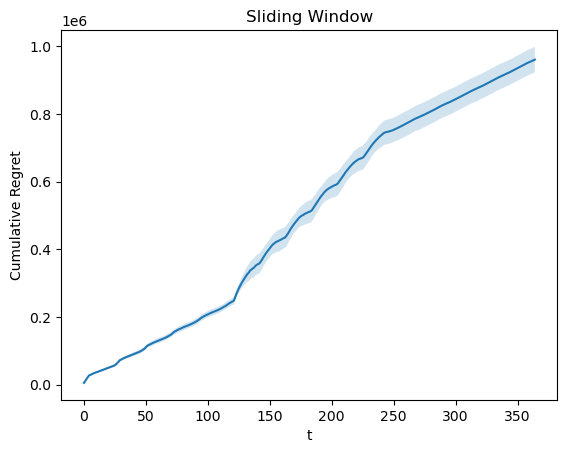

In [10]:
plt.figure(4)
plt.title("Sliding Window")
plt.xlabel("t")
plt.ylabel("Cumulative Regret")
for idx, window_size in enumerate(window_sizes):
    swucb_rewards_per_experiment_per_parameters = []
    cumregret_swucb_per_parameters = []
    for e in tqdm(range(0, n_experiments)):
        swucb_learner = ucb_opt.UCB_BaseOptimizer_5(swucb.SWUCB, class_id,
                                                    (n_arms, window_size))

        for t in range(0, T):
            pulled_arm_price, pulled_arm_bid = swucb_learner.pull_arm()
            reward = env.round(pulled_arm_price, pulled_arm_bid, t)
            swucb_learner.update(pulled_arm_price, reward)
        swucb_rewards_per_experiment_per_parameters.append(swucb_learner.collected_rewards)
        cumregret_swucb_per_parameters.append(np.cumsum(opt - swucb_rewards_per_experiment_per_parameters[e]))
    plt.plot(np.mean(cumregret_swucb_per_parameters, axis=0), label=f'SW={window_size}')
    plt.fill_between(range(T), np.mean(cumregret_swucb_per_parameters, axis=0) - np.std(cumregret_swucb_per_parameters, axis=0),
                    np.mean(cumregret_swucb_per_parameters, axis=0) + np.std(cumregret_swucb_per_parameters, axis=0), alpha=0.2)
plt.legend()
plt.show()

# 2. CUSUM-UCB with different M

In [5]:
Ms = [1, 5, 25, 80, 200]

100%|██████████| 500/500 [00:27<00:00, 18.25it/s]


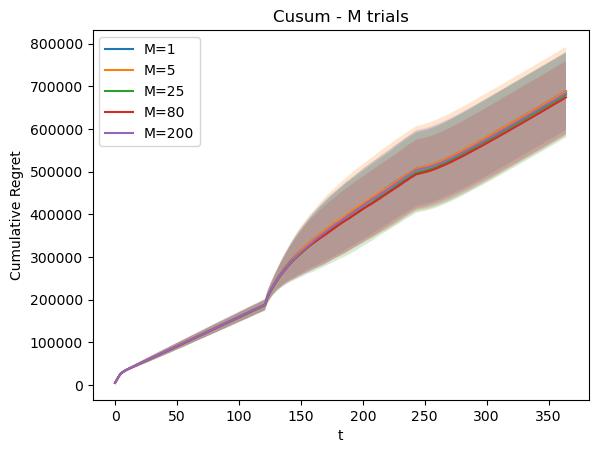

In [6]:
plt.figure(0)
plt.title("Cusum - M trials")
plt.xlabel("t")
plt.ylabel("Cumulative Regret")
for idx, M_ in enumerate(Ms):
    cusum_ucb_rewards_per_experiment_per_parameters = []
    cumregret_cusum_ucb_per_parameters = []
    for e in tqdm(range(0, n_experiments)):
        cusum_ucb_learner = ucb_opt.UCB_BaseOptimizer_5(cusumucb.CusumUCBLearner, class_id,
                                                        (n_arms, M_, eps, h, alpha))

        for t in range(0, T):
            pulled_arm_price, pulled_arm_bid = cusum_ucb_learner.pull_arm()
            reward = env.round(pulled_arm_price, pulled_arm_bid, t)
            cusum_ucb_learner.update(pulled_arm_price, reward)
        cusum_ucb_rewards_per_experiment_per_parameters.append(cusum_ucb_learner.collected_rewards)
        cumregret_cusum_ucb_per_parameters.append(np.cumsum(opt - cusum_ucb_rewards_per_experiment_per_parameters[e]))
    plt.plot(np.mean(cumregret_cusum_ucb_per_parameters, axis=0), label=f'M={M_}')
    plt.fill_between(range(T), np.mean(cumregret_cusum_ucb_per_parameters, axis=0) - np.std(cumregret_cusum_ucb_per_parameters, axis=0),
                     np.mean(cumregret_cusum_ucb_per_parameters, axis=0) + np.std(cumregret_cusum_ucb_per_parameters, axis=0), alpha=0.2)
plt.legend()
plt.show()

# 3. CUSUM-UCB with different h

In [7]:
hs = np.array([0.01, 0.1, 0.5, 1, 5]) * np.log(T)

 64%|██████▍   | 319/500 [00:18<00:10, 17.05it/s]


KeyboardInterrupt: 

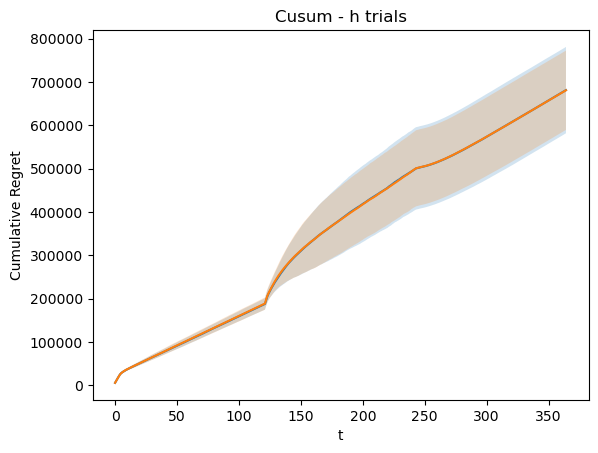

In [8]:
plt.figure(1)
plt.title("Cusum - h trials")
plt.xlabel("t")
plt.ylabel("Cumulative Regret")
for idx, h_ in enumerate(hs):
    cusum_ucb_rewards_per_experiment_per_parameters = []
    cumregret_cusum_ucb_per_parameters = []
    for e in tqdm(range(0, n_experiments)):
        cusum_ucb_learner = ucb_opt.UCB_BaseOptimizer_5(cusumucb.CusumUCBLearner, class_id,
                                                        (n_arms, M, eps, h_, alpha))
        for t in range(0, T):
            pulled_arm_price, pulled_arm_bid = cusum_ucb_learner.pull_arm()
            reward = env.round(pulled_arm_price, pulled_arm_bid, t)
            cusum_ucb_learner.update(pulled_arm_price, reward)
        cusum_ucb_rewards_per_experiment_per_parameters.append(cusum_ucb_learner.collected_rewards)
        cumregret_cusum_ucb_per_parameters.append(np.cumsum(opt - cusum_ucb_rewards_per_experiment_per_parameters[e]))
    plt.plot(np.mean(cumregret_cusum_ucb_per_parameters, axis=0), label='h={:.2f}'.format(h_))
    plt.fill_between(range(T), np.mean(cumregret_cusum_ucb_per_parameters, axis=0) - np.std(cumregret_cusum_ucb_per_parameters, axis=0),
                   np.mean(cumregret_cusum_ucb_per_parameters, axis=0) + np.std(cumregret_cusum_ucb_per_parameters, axis=0), alpha=0.2)
plt.legend()
plt.show()

# 4. CUSUM-UCB with different eps

In [5]:
epss = [0.001, 0.01, 0.1, 0.3, 0.5]

100%|██████████| 100/100 [00:12<00:00,  8.04it/s]


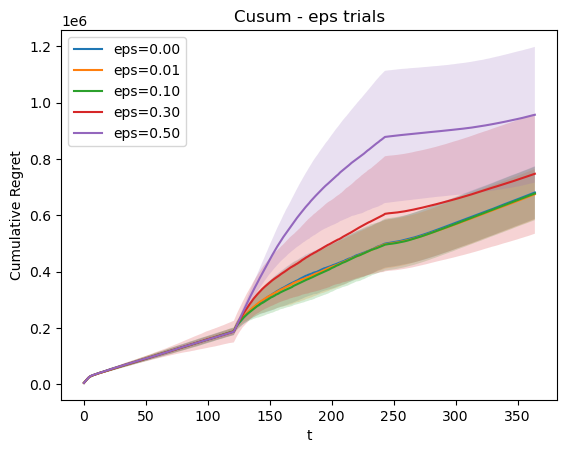

In [6]:
plt.figure(2)
plt.title("Cusum - eps trials")
plt.xlabel("t")
plt.ylabel("Cumulative Regret")
for idx, eps_ in enumerate(epss):
    cusum_ucb_rewards_per_experiment_per_parameters = []
    cumregret_cusum_ucb_per_parameters = []
    for e in tqdm(range(0, n_experiments)):
        cusum_ucb_learner = ucb_opt.UCB_BaseOptimizer_5(cusumucb.CusumUCBLearner, class_id,
                                                        (n_arms, M, eps_, h, alpha))
        for t in range(0, T):
            pulled_arm_price, pulled_arm_bid = cusum_ucb_learner.pull_arm()
            reward = env.round(pulled_arm_price, pulled_arm_bid, t)
            cusum_ucb_learner.update(pulled_arm_price, reward)
        cusum_ucb_rewards_per_experiment_per_parameters.append(cusum_ucb_learner.collected_rewards)
        cumregret_cusum_ucb_per_parameters.append(np.cumsum(opt - cusum_ucb_rewards_per_experiment_per_parameters[e]))
    plt.plot(np.mean(cumregret_cusum_ucb_per_parameters, axis=0), label='eps={:.2f}'.format(eps_))
    plt.fill_between(range(T), np.mean(cumregret_cusum_ucb_per_parameters, axis=0) - np.std(cumregret_cusum_ucb_per_parameters, axis=0),
                          np.mean(cumregret_cusum_ucb_per_parameters, axis=0) + np.std(cumregret_cusum_ucb_per_parameters, axis=0), alpha=0.2)
plt.legend()
plt.show()

# 5. CUSUM-UCB with different alpha

In [11]:
alphas = np.sqrt(np.array([0.1, 1, 5, 10, 25])) * np.sqrt(np.log(T) / T)

100%|██████████| 100/100 [00:05<00:00, 17.51it/s]


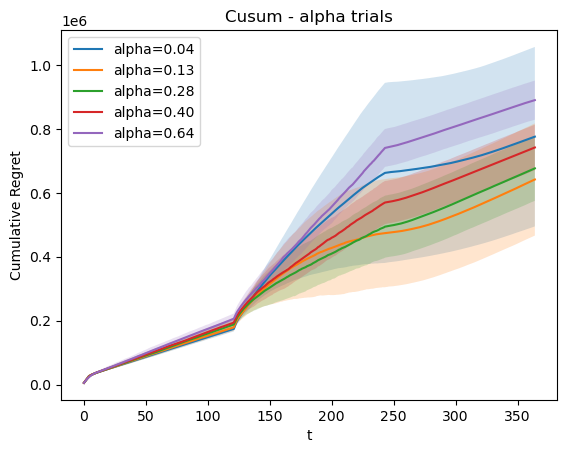

In [13]:
plt.figure(3)
plt.title("Cusum - alpha trials")
plt.xlabel("t")
plt.ylabel("Cumulative Regret")
for idx, alpha_ in enumerate(alphas):
    cusum_ucb_rewards_per_experiment_per_parameters = []
    cumregret_cusum_ucb_per_parameters = []
    for e in tqdm(range(0, n_experiments)):
        cusum_ucb_learner = ucb_opt.UCB_BaseOptimizer_5(cusumucb.CusumUCBLearner, class_id,
                                                        (n_arms, M, eps, h, alpha_))

        for t in range(0, T):
            pulled_arm_price, pulled_arm_bid = cusum_ucb_learner.pull_arm()
            reward = env.round(pulled_arm_price, pulled_arm_bid, t)
            cusum_ucb_learner.update(pulled_arm_price, reward)
        cusum_ucb_rewards_per_experiment_per_parameters.append(cusum_ucb_learner.collected_rewards)
        cumregret_cusum_ucb_per_parameters.append(np.cumsum(opt - cusum_ucb_rewards_per_experiment_per_parameters[e]))
    plt.plot(np.mean(cumregret_cusum_ucb_per_parameters, axis=0), label='alpha={:.2f}'.format(alpha_))

    plt.fill_between(range(T), np.mean(cumregret_cusum_ucb_per_parameters, axis=0) - np.std(cumregret_cusum_ucb_per_parameters, axis=0),
                          np.mean(cumregret_cusum_ucb_per_parameters, axis=0) + np.std(cumregret_cusum_ucb_per_parameters, axis=0), alpha=0.2)
plt.legend()
plt.show()